<a href="https://colab.research.google.com/github/handsomekiwi/JupyterPractice/blob/master/ML_course_HW/Y2019%20HW10_2u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
import matplotlib.pyplot as plt 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalMaxPooling2D,BatchNormalization
import os  

Using TensorFlow backend.


In [0]:
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 

In [0]:
np.random.seed(10)

In [0]:
from keras.datasets import cifar100
#Cifra-100 有50000筆training data 10000筆testing data 32*32的彩色圖片 共100類
(x_train_image, y_train_label), (x_test_image, y_test_label) = cifar100.load_data(label_mode='fine')


In [0]:
# normalize and onehot
x_train_normalize=x_train_image.astype('float32')/255.0
x_test_normalize=x_test_image.astype('float32')/255.0  


y_train_onehot=np_utils.to_categorical(y_train_label)
y_test_onehot=np_utils.to_categorical(y_test_label)

In [12]:
#create model
model=Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(32,32,3)))
                
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same', 
                 input_shape=(16,16,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(100,activation='softmax'))

model.summary()  
print("") 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 64)       

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=128,verbose=2)


W0902 14:41:47.846215 139631892072320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 15s - loss: 3.5949 - acc: 0.1681 - val_loss: 3.4516 - val_acc: 0.1927
Epoch 2/10
 - 11s - loss: 2.8083 - acc: 0.2929 - val_loss: 3.3684 - val_acc: 0.2317
Epoch 3/10
 - 11s - loss: 2.4291 - acc: 0.3697 - val_loss: 2.7292 - val_acc: 0.3190
Epoch 4/10
 - 11s - loss: 2.1772 - acc: 0.4247 - val_loss: 2.9378 - val_acc: 0.3009
Epoch 5/10
 - 11s - loss: 1.9791 - acc: 0.4686 - val_loss: 3.3397 - val_acc: 0.2684
Epoch 6/10
 - 11s - loss: 1.7988 - acc: 0.5098 - val_loss: 2.3957 - val_acc: 0.3990
Epoch 7/10
 - 11s - loss: 1.6380 - acc: 0.5454 - val_loss: 2.7000 - val_acc: 0.3554
Epoch 8/10
 - 11s - loss: 1.4749 - acc: 0.5832 - val_loss: 2.3789 - val_acc: 0.4098
Epoch 9/10
 - 11s - loss: 1.3365 - acc: 0.6181 - val_loss: 2.2942 - val_acc: 0.4318
Epoch 10/10
 - 11s - loss: 1.2087 - acc: 0.6473 - val_loss: 2.6047 - val_acc: 0.3904


NameError: ignored

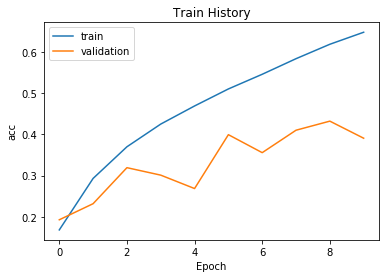

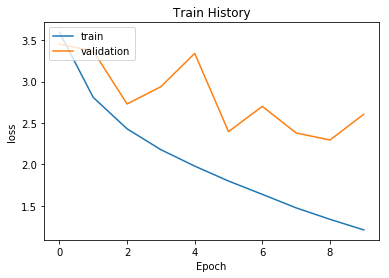

10000/10000 [==============================] - 2s 162us/step

	[Info] Accuracy of testing data = 39.1%


In [15]:
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')
scores = model.evaluate(x_test_normalize, y_test_onehot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 